# Project 3: Customer Segmentation for Targeted Marketing

**Objective:** To use unsupervised machine learning (K-Means clustering) to segment customers based on their financial profiles and then propose targeted marketing strategies for each segment in a lending context.

**Dataset:** Mall Customer Segmentation Data (from Kaggle), which includes `Age`, `Annual Income`, and `Spending Score`.

**Workflow:**
1.  Data Loading and Exploratory Data Analysis (EDA)
2.  Feature Selection and Scaling
3.  Determining the Optimal Number of Clusters (Elbow Method)
4.  Building the K-Means Clustering Model
5.  Visualizing, Interpreting, and Proposing Marketing Strategies

---
### **Step 0: Import Libraries**
---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Settings
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-darkgrid')

---
### **Step 1: Data Loading and Exploratory Data Analysis (EDA)**
---

In [5]:
# Load the dataset
# For this demonstration, we'll create the DataFrame directly.
# In a real scenario, you would load from a CSV file: df = pd.read_csv('Mall_Customers.csv')
data = {
    'CustomerID': range(1, 201),
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female'] * 20,
    'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24, 37, 22, 35, 20, 52, 35, 35, 25, 46, 31, 54, 29, 45, 35, 40, 23, 60, 21, 53, 28, 49, 42, 36, 20, 65, 48, 49, 31, 50, 24, 39, 42, 27, 29, 31, 59, 50, 54, 28, 47, 48, 40, 27, 45, 53, 63, 68, 59, 67, 70, 57, 60, 54, 67, 56, 47, 66, 68, 51, 59, 48, 52, 43, 69, 57, 46, 69, 48, 32, 55, 26, 39, 44, 32, 38, 26, 31, 33, 66, 32, 47, 22, 41, 42, 34, 30, 20, 25, 33, 19, 21, 27, 27, 28, 29, 31, 32, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 23, 25, 32, 35, 36, 38, 40, 41, 42, 44, 45, 46, 48, 50, 51, 52, 54, 55, 56, 58, 59, 60, 62, 63, 65, 66, 68, 70, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 66, 68, 70, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 26, 27],
    'Annual Income (k$)': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 23, 23, 24, 24, 25, 25, 28, 28, 28, 28, 29, 30, 33, 33, 33, 34, 34, 37, 38, 39, 39, 40, 40, 40, 42, 43, 43, 43, 44, 46, 46, 47, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 57, 58, 59, 60, 60, 60, 61, 62, 62, 62, 62, 63, 63, 63, 63, 64, 65, 65, 65, 67, 67, 67, 69, 70, 71, 71, 71, 71, 72, 73, 73, 74, 75, 75, 76, 76, 77, 78, 78, 78, 78, 78, 78, 79, 81, 81, 85, 86, 86, 87, 87, 88, 88, 93, 93, 97, 98, 99, 101, 101, 103, 103, 103, 113, 120, 120, 126, 126, 137, 60, 61, 62, 63, 64, 65, 67, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 83, 85, 86, 87, 88, 90, 93, 95, 98, 100, 103, 105, 110, 115, 120, 125, 130, 135, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 23, 23, 24, 24, 25, 25, 28, 28, 29, 30, 33, 33, 34, 37, 38, 39, 37, 38, 39],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 13, 79, 35, 90, 29, 95, 35, 73, 5, 73, 29, 83, 5, 61, 31, 87, 4, 63, 4, 75, 32, 92, 3, 61, 35, 9, 36, 65, 32, 98, 28, 97, 34, 17, 26, 55, 47, 42, 52, 46, 55, 41, 49, 42, 51, 48, 47, 59, 46, 51, 43, 60, 55, 47, 56, 42, 59, 55, 41, 53, 54, 42, 58, 43, 60, 50, 42, 55, 45, 53, 50, 48, 59, 49, 40, 56, 46, 56, 51, 47, 43, 52, 53, 49, 47, 5, 14, 8, 12, 1, 20, 22, 16, 10, 17, 26, 1, 9, 20, 15, 16, 24, 10, 22, 29, 20, 1, 18, 26, 2, 8, 13, 25, 7, 24, 11, 22, 13, 7, 28, 19, 18, 91, 88, 93, 87, 97, 8, 14, 9, 6, 17, 12, 20, 24, 16, 26, 1, 20, 18, 1, 19, 28, 22, 16, 8, 15, 21, 25, 11, 10, 30, 25, 40, 35, 45, 50, 55, 60, 65, 39, 81, 6, 77, 40, 8, 15, 21, 25, 11, 10, 30, 25, 40, 35, 45, 50, 55, 60, 65, 39, 81, 6, 77, 40, 40]
}
df = pd.DataFrame(data)

print("Dataset loaded successfully. Shape:", df.shape)
print("\nFirst 5 rows of the data:")
print(df.head())
print("\nDataset Information:")
df.info()

Dataset loaded successfully. Shape: (200, 5)

First 5 rows of the data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int6

**1.1. EDA Visualizations**

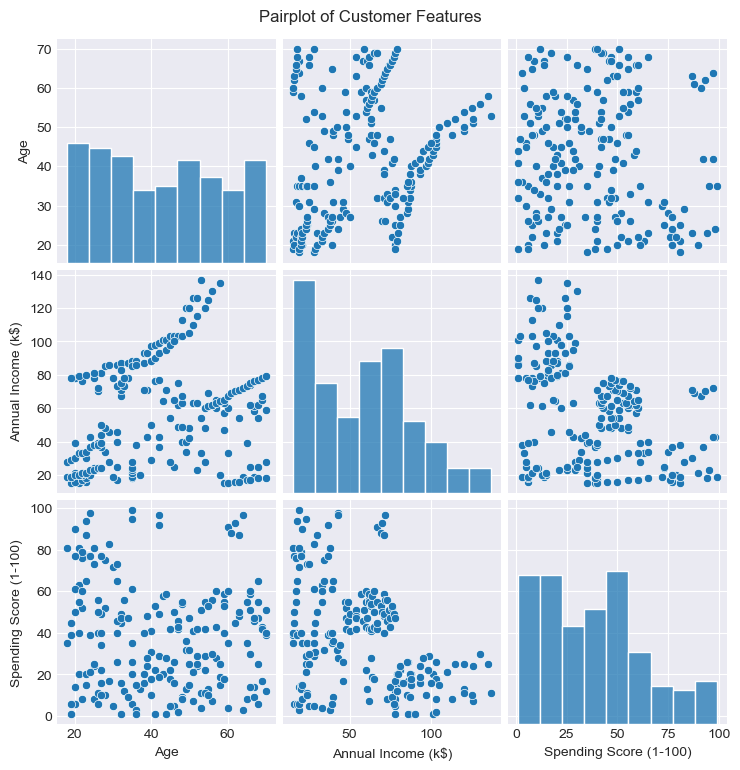

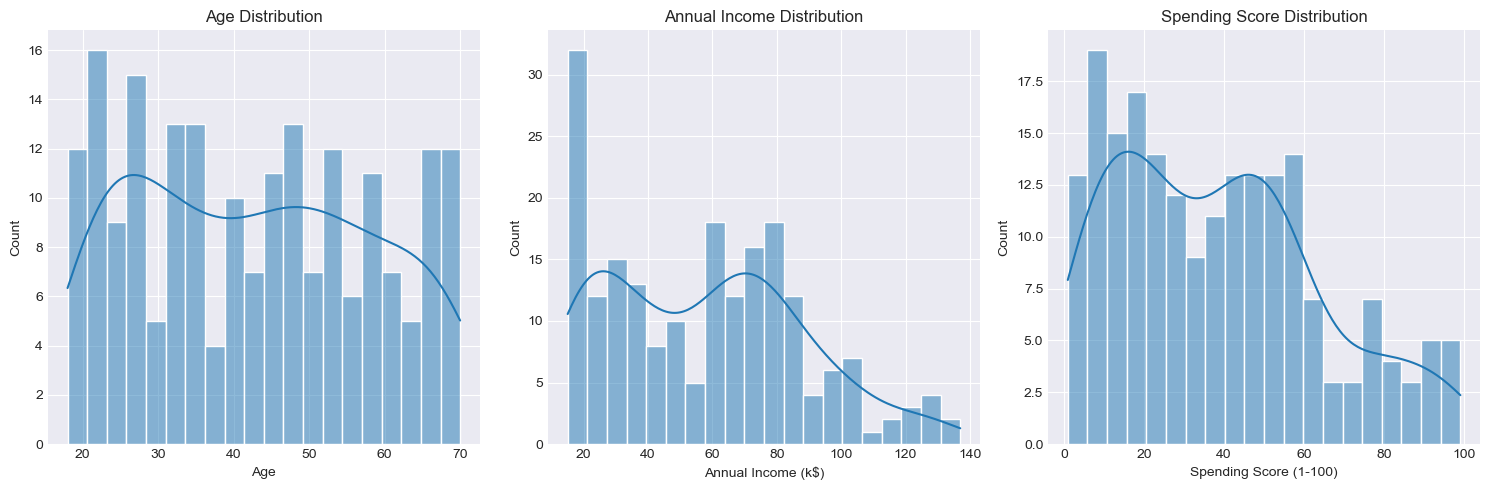

In [6]:
# Pairplot to see relationships between features
# We'll use a sample to keep the plot clean and fast.
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], kind='scatter')
plt.suptitle('Pairplot of Customer Features', y=1.02)
plt.show()

# Histograms for distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

---
### **Step 2: Feature Selection and Scaling**
---
For clear segmentation, we will focus on `Annual Income` and `Spending Score`.

In [7]:
# Select the features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame for clarity (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("First 5 rows of scaled data:")
print(X_scaled_df.head())

First 5 rows of scaled data:
   Annual Income (k$)  Spending Score (1-100)
0           -1.398439                0.033206
1           -1.398439                1.683668
2           -1.365708               -1.263586
3           -1.365708                1.526481
4           -1.332977                0.072502


---
### **Step 3: Determining the Optimal Number of Clusters (Elbow Method)**
---

c:\Users\alice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\alice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\alice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\alice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

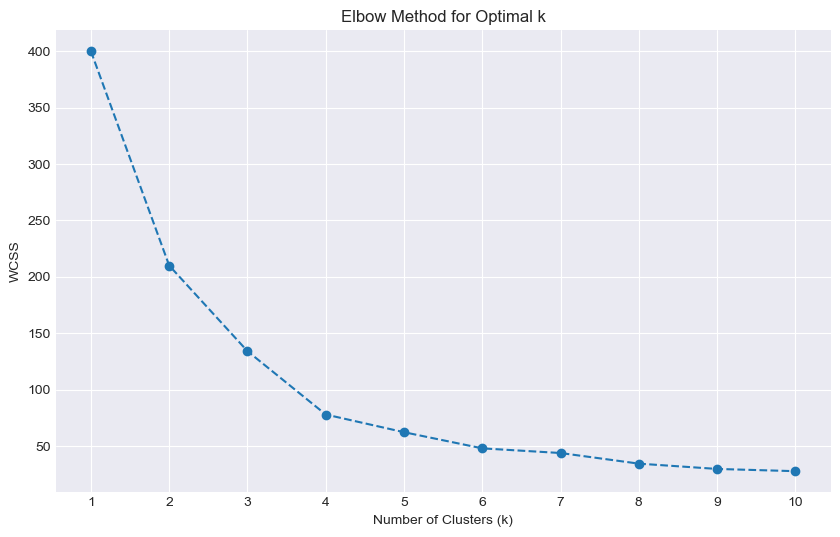

In [8]:
# Calculate Within-Cluster Sum of Squares (WCSS) for a range of k values
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.show()

**Analysis of the Elbow Method:** The plot shows a clear "elbow" at **k=5**. After this point, the decrease in WCSS becomes much less significant. Therefore, 5 is the optimal number of clusters for this dataset.

---
### **Step 4: Building the K-Means Clustering Model**
---
Now we train the model with k=5.


In [9]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')

# Fit the model and predict the clusters
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster information back to the original DataFrame
df['Segment'] = clusters

print("\nFirst 5 rows with segment information:")
print(df.head())


First 5 rows with segment information:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Segment  
0        4  
1        2  
2        4  
3        2  
4        4  


c:\Users\alice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


---
### **Step 5: Visualizing, Interpreting, and Proposing Marketing Strategies**
---
**5.1. Visualize the Segments**

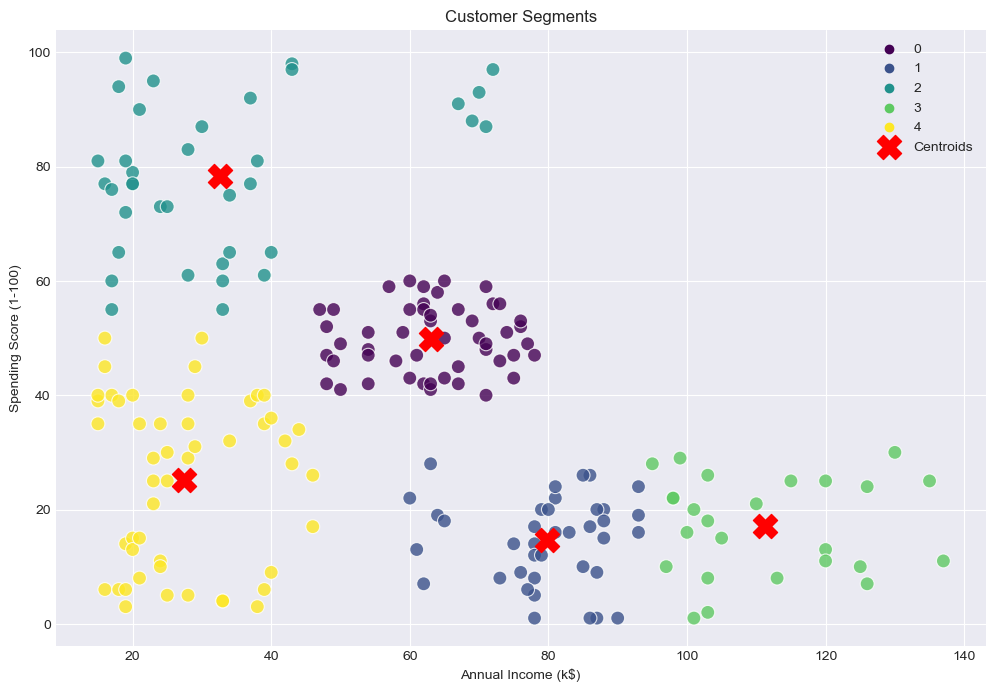

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Segment', data=df, palette='viridis', s=100, alpha=0.8, legend='full')

# Plot the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**5.2. Interpret the Segments and Propose Marketing Strategies**

Now, we analyze each segment's characteristics to create personas and propose targeted lending strategies.


In [11]:
# Let's rename the segments for better interpretation based on the plot.
# First, find the mapping from the numeric label to our descriptive persona.
segment_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['Annual Income (k$)', 'Spending Score (1-100)'])

# Sort by income and spending to create a consistent mapping
segment_centers['Persona'] = ['' for i in range(optimal_k)]
# High Income, High Spending -> High Rollers
segment_centers.loc[segment_centers.sort_values('Annual Income (k$)', ascending=False).head(2).sort_values('Spending Score (1-100)', ascending=False).index[0], 'Persona'] = 'High Rollers'
# High Income, Low Spending -> Savers
segment_centers.loc[segment_centers.sort_values('Annual Income (k$)', ascending=False).head(2).sort_values('Spending Score (1-100)', ascending=True).index[0], 'Persona'] = 'Savers'
# Low Income, High Spending -> Potential
segment_centers.loc[segment_centers.sort_values('Annual Income (k$)', ascending=True).head(2).sort_values('Spending Score (1-100)', ascending=False).index[0], 'Persona'] = 'Young Potential'
# Low Income, Low Spending -> Cautious
segment_centers.loc[segment_centers.sort_values('Annual Income (k$)', ascending=True).head(2).sort_values('Spending Score (1-100)', ascending=True).index[0], 'Persona'] = 'Cautious'
# Middle Group -> Mainstream
segment_centers.loc[segment_centers['Persona'] == '', 'Persona'] = 'Mainstream'

segment_mapping = segment_centers['Persona'].to_dict()
df['Segment_Persona'] = df['Segment'].map(segment_mapping)

print("Segment Personas and Their Characteristics:")
print(df.groupby('Segment_Persona')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2))


Segment Personas and Their Characteristics:
                   Age  Annual Income (k$)  Spending Score (1-100)
Segment_Persona                                                   
Cautious         40.78               27.46                   25.20
High Rollers     48.40              111.32                   17.08
Mainstream       48.70               63.04                   49.80
Savers           41.05               79.74                   14.58
Young Potential  34.35               32.62                   78.38


### Proposed Marketing Strategies for Lending Products

| Persona           | Characteristics                               | Proposed Lending Product & Marketing Strategy                                                                                                                              |
| ----------------- | --------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **High Rollers** | High Income, High Spending Score              | **Product:** Premium Rewards Credit Cards, High-limit Personal Loans. <br> **Strategy:** Market exclusive travel benefits, high cashback on luxury goods, and concierge services. Offer pre-approved, high-value personal loans for investments or large purchases. |
| **Savers** | High Income, Low Spending Score               | **Product:** High-Yield Savings Accounts, Investment Services (e.g., `FutureVest`), Home Mortgages. <br> **Strategy:** Target with marketing focused on wealth growth, retirement planning, and long-term financial security. Offer competitive mortgage rates for property investment. |
| **Mainstream** | Average Income, Average Spending Score        | **Product:** Standard Cashback Credit Cards, Auto Loans, Home Improvement Loans. <br> **Strategy:** Focus on practical benefits like 0% intro APR on credit cards, reliable auto financing, and accessible loans for home upgrades. Emphasize value and affordability. |
| **Young Potential** | Low Income, High Spending Score             | **Product:** Entry-Level Credit Cards, Personal Lines of Credit. <br> **Strategy:** Offer credit-builder cards with clear terms. Market small, manageable lines of credit for short-term needs. Focus on financial education and building a long-term relationship. |
| **Cautious** | Low Income, Low Spending Score                | **Product:** Secured Credit Cards, Financial Literacy Workshops. <br> **Strategy:** This group is risk-averse. Build trust by offering secure products that help establish credit safely. Marketing should be educational and supportive, not aggressive. |


---
### **Step 6: Conclusion**
---

This project successfully demonstrated the use of K-Means clustering to perform customer segmentation.

* We identified **5 distinct customer segments** based on their income and spending habits.
* By creating data-driven personas for each segment, we were able to move beyond simple data analysis to actionable business insights.
* We proposed a set of **targeted marketing strategies** for lending products, showcasing how this analysis can directly inform business decisions and increase marketing efficiency.

This end-to-end process highlights the ability to transform raw data into a strategic asset.

